# Airlines passenger volumne forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
df = pd.read_csv(r"E:\MLIoT\ML\dataset\civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly (1)\civil-aircraft-arrivals-departures-and-passengers-changi-airport-monthly.csv")
df.shape

(974, 3)

In [3]:
df.head()

,month,level_1,value
0,1980-01,Total Aircraft Arrivals And Departures,6501
1,1980-01,Total Passengers,566879
2,1980-02,Total Aircraft Arrivals And Departures,6112
3,1980-02,Total Passengers,552263
4,1980-03,Total Aircraft Arrivals And Departures,6391


In [4]:
df = df[df.level_1=="Total Passengers"]
df.month = pd.to_datetime(df.month)
df.index = df.month
df = df[['value']]
df.head()

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,value
month,
1980-01-01,566879
1980-02-01,552263
1980-03-01,597644
1980-04-01,561218
1980-05-01,587003


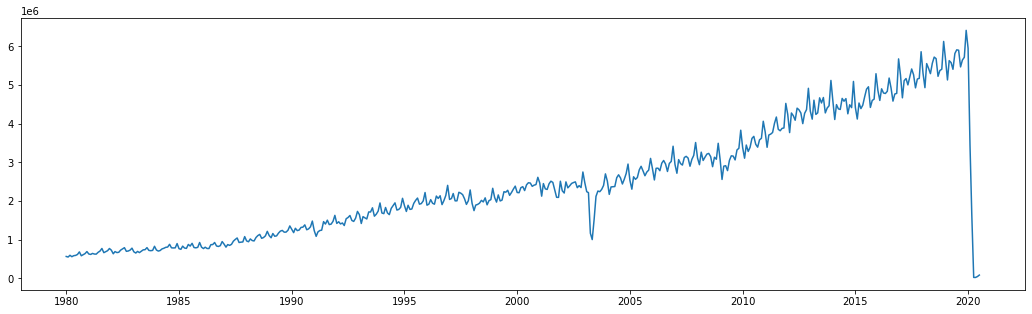

In [7]:
plt.figure(figsize=(18,5))
plt.plot(df)
plt.show()

In [12]:
df2 = df['2007-01-01':'2018-12-01']
df2.shape

(144, 1)

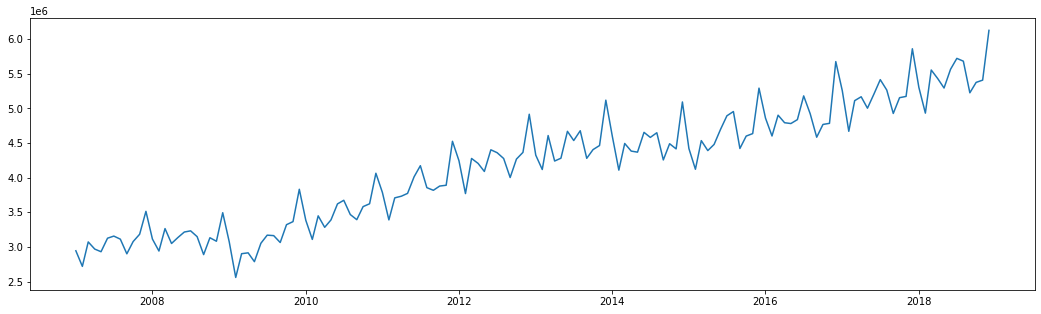

In [13]:
plt.figure(figsize=(18,5))
plt.plot(df2)
plt.show()

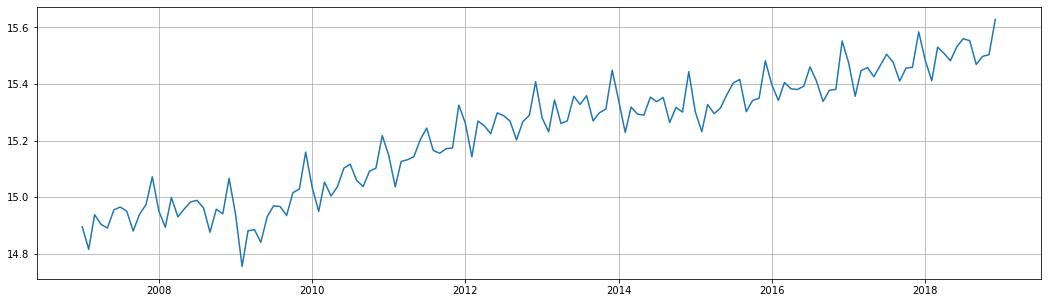

In [15]:
dflog = np.log(df2)
plt.figure(figsize=(18,5))
plt.plot(dflog)
plt.grid(True)
plt.show()

### Dicky Fuller test
    Null Hypothesis - data is not stationary
    
    Ci = 90%, alpha = 0.1
    - if pvalue>alpha = accept null hypothesis, data has trend
    -if pvalue<alpha = reject null hyothesis, data has no trend

In [21]:
from statsmodels.tsa.stattools import adfuller
adfuller(np.array(dflog.value))

(-0.5732801716757984,
 0.8769060376153011,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 -503.22827684721403)

In [22]:
dflogdiff = dflog - dflog.shift(1)

In [23]:
dflogdiff.head(10)

,value
month,
2007-01-01,NaN
2007-02-01,-0.079567
2007-03-01,0.122019
2007-04-01,-0.034116
2007-05-01,-0.012965
2007-06-01,0.064492
2007-07-01,0.009725
2007-08-01,-0.014158
2007-09-01,-0.070408


In [24]:
adfuller(np.array(dflogdiff.dropna().value))

(-2.859080645373528,
 0.05031747853430201,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -506.8520826056348)

## Autocorrelation and Partial autocorrelation

In [26]:
dflogdiff.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


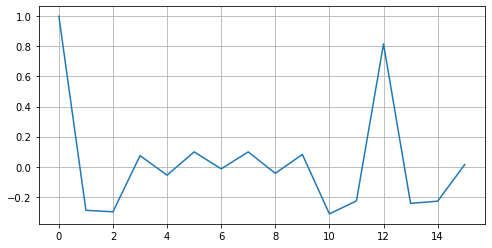

In [27]:
from statsmodels.tsa.stattools import acf,pacf

ac = acf(dflogdiff,nlags=15)
plt.figure(figsize=(8,4))
plt.plot(ac)
plt.grid(True)
plt.show()

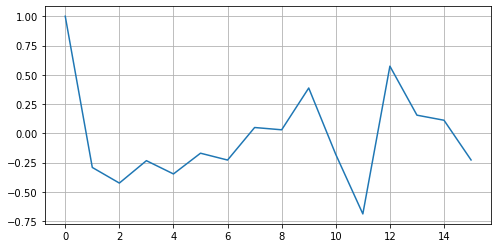

In [28]:
pac = pacf(dflogdiff,nlags=15)
plt.figure(figsize=(8,4))
plt.plot(pac)
plt.grid(True)
plt.show()

In [ ]:
# p = 1, d = 1, q = 1

## ARIMA

In [29]:
from statsmodels.tsa import arima_model
arima = arima_model.ARIMA(dflog,order=(1,1,1))
model = arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<Figure size 864x360 with 0 Axes>

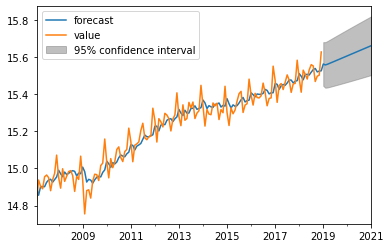

In [34]:
plt.figure(figsize=(12,5))
model.plot_predict(start=1,end=168)
plt.show()

In [43]:
actual = df['2019-01-01':'2019-12-01']
prediction = model.forecast(steps=12)

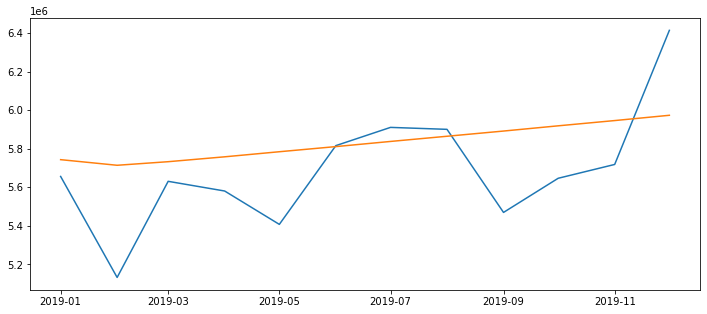

In [44]:
prediction = np.exp(prediction[0])
prediction = pd.DataFrame(prediction,index=actual.index)
plt.figure(figsize=(12,5))
plt.plot(actual)
plt.plot(prediction)
plt.show()

In [48]:
predictions = model.forecast(steps=12)
c1 = predictions[2][:,0]
c2 = predictions[2][:,1]
c1 = pd.DataFrame(np.exp(c1),index=actual.index)
c2 = pd.DataFrame(np.exp(c2),index=actual.index)

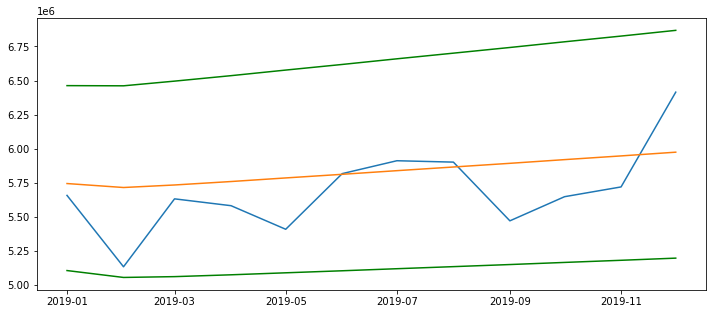

In [49]:
plt.figure(figsize=(12,5))
plt.plot(actual)
plt.plot(prediction)
plt.plot(c1,c='g')
plt.plot(c2,c='g')
plt.show()

## Seasonal ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


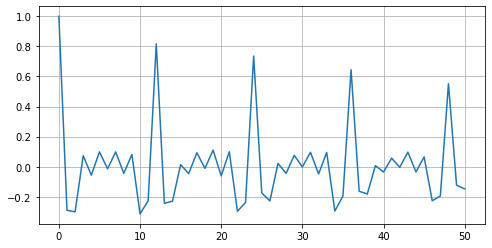

In [50]:
from statsmodels.tsa.stattools import acf,pacf

ac = acf(dflogdiff,nlags=50)
plt.figure(figsize=(8,4))
plt.plot(ac)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


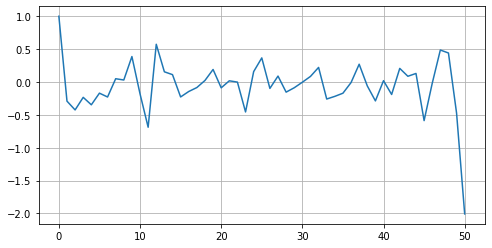

In [51]:
pac = pacf(dflogdiff,nlags=50)
plt.figure(figsize=(8,4))
plt.plot(pac)
plt.grid(True)
plt.show()

In [52]:
# p,d,q = 1,1,1
# P,D,Q, lags, = 1,1,1,12

In [53]:
from statsmodels.tsa.statespace import sarimax
sarima=sarimax.SARIMAX(dflog,order=(1,1,1),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [54]:
model2 = sarima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [58]:
predictions = model2.forecast(steps=12)
predictions = pd.DataFrame(predictions)
predictions

,0
2019-01-01,15.528643
2019-02-01,15.439531
2019-03-01,15.544175
2019-04-01,15.518056
2019-05-01,15.510369
2019-06-01,15.565079
2019-07-01,15.586397
2019-08-01,15.569524
2019-09-01,15.499173
2019-10-01,15.544545


In [60]:
predictions[0] = np.exp(predictions[0])

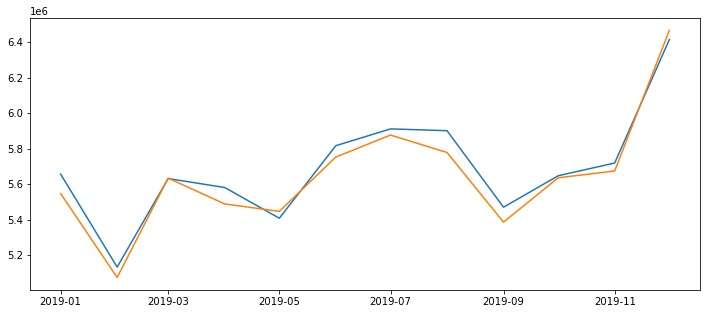

In [61]:
plt.figure(figsize=(12,5))
plt.plot(actual)
plt.plot(predictions)
plt.show()